## Cleaning and Simple EDA on Titanic Data
In this Notebook, we will be exploring a slightly modified version of the [`titanic` dataset](https://www.kaggle.com/c/titanic/data). Note that for this activity, you should get the dataset from AnimoSpace since it is a slightly modified version of the one in the link above. In the process of exploring this data, we will be covering techniques on exploratory data analysis.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email me at arren.antioquia@dlsu.edu.ph

## Import
Import **pandas** and **matplotlib**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset
For this notebook, we will working on a dataset called `titanic` dataset. This dataset contains passenger information from a subset of passengers of Titanic.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

If you view the `.csv` file in Excel, you can see that our dataset contains many **observations** (rows) across 12 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Passenger`**: Passenger number.
- **`Survived`**: Indicates if the passenger has survived (1) or not (0).
- **`Pclass`**: Ticket class. 1 = Upper; 2 = Middle; 3 = Lower.
- **`Name`**: Name of the passenger.
- **`Sex`**: Sex.
- **`Age`**: Age.
- **`SibSp`**: Number of siblings / spouses aboard the Titanic.
- **`Parch`**: Number of parents / children aboard the Titanic.
- **`Ticket`**: Ticket Number.
- **`Fare`**: Passenger fare.
- **`Cabin`**: Cabin number.
- **`Embarked`**: Point of embarkation. C = Cherbourg; Q = Queenstown; S = Southampton.

## Reading the Dataset
Our first step is to load the dataset using `pandas`. This will load the dataset into a pandas `DataFrame`. To load the dataset, we use the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Note that you may need to change the path depending on the location of the file in your machine.

In [3]:
titanic_df = pd.read_csv("./titanic.csv")

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning the Dataset
The next step in Exploratory Data Analysis is cleaning the data.

Let's first check if the values in relevant variables in the dataset are within the range of acceptable values. 

### `Survived` variable
Check if the values for the `Survived` varible is either 1 or 0. Use the [`unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to list all unique values for this variable.

In [5]:
titanic_df['Survived'].unique()

array([0, 1])

### `Pclass` variable
**Practice!** Valid values for the `Pclass` variable are 1, 2, or 3. List all unique values for the `Pclass` variable.

In [6]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Pclass'].unique()

array([3, 1, 2])

**Question:** Do we need to perform data cleaning for the `Pclass` variable? Explain.
- No, because the unique values in `Pclass` are consistent with its supposed valid values. Furthermore, all of the observations have non-null values in the said variable.

### `Sex` variable
List all unique values for the `Sex` variable.

In [7]:
titanic_df['Sex'].unique()

array(['male', 'female', 'm', 'M', 'F', 'f', 'Female', 'Male'],
      dtype=object)

Since we discover that there are multiple representations of the same sex (`Male`, `M`, `m`, `male` for male; `Female`, `F`, `f`, `female` for female), let's modify these values to combine different representations. It would be best to check the most prevalent representation for each sex. To find out the number of observations per value, we use the [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) function. This function returns the count of each unique value in the Series.

In [8]:
titanic_df['Sex'].value_counts()

male      551
female    300
m          12
M          10
F           7
Male        4
f           4
Female      3
Name: Sex, dtype: int64

We discover that most observations in the dataset use the `male` and `female` representations. We'll use the [`map`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function to change the values of the other representations. 

In [9]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 'male', 'm': 'male', 'M': 'male', 'Male': 'male', 
                                           'female': 'female', 'f': 'female', 'F': 'female', 'Female': 'female'})

Upon mapping all equivalent values to `male` and `female`, let's check the unique values for the `Sex` variable.

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

### `Embarked` variable
**Practice!** List all unique values for the `Embarked` variable.

In [11]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'].unique()

array(['S', 'c', 'q', 'C', 'Q', nan, 's'], dtype=object)

**Practice!** Determine if the variable contains multiple representation pertaining to the same value. If needed, map the other values to their corresponding prevalent representation.

In [12]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'].value_counts()

S    618
C    154
Q     63
s     26
q     14
c     14
Name: Embarked, dtype: int64

In [13]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 'S', 's': 'S', 'C': 'C', 'c': 'C', 'Q': 'Q', 'q': 'Q'})

After performing some operations (if needed), let's check the unique values for the `Embarked` variable again.

In [14]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Checking for `NaN`s
We will now handle missing data in our dataset. Let us check each variable if it contains a `NaN` / `null` value. We'll use the [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`any`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html) functions for this. This function call will list each variable with a boolean value indicating if the variable contains a `NaN` / `null` value.

In [15]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Let's get the list of columns with `NaN` / `null` values.

In [16]:
nan_variables = titanic_df.columns[titanic_df.isnull().any()].tolist()
print(nan_variables)

['Age', 'Cabin', 'Embarked']


For each variable, show the total number of observation with `NaN` / `null` value.

In [17]:
for variable in nan_variables:
    print(variable, sum(titanic_df[variable].isnull()))

Age 177
Cabin 687
Embarked 2


**Practice!** Since we see that there is a very small number of observation with `NaN` / `null` value for the `Embarked` variable, we can decide to drop those observations from the dataset. 

**Hint!** Use the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function.

In [21]:
# Write your code here. You may add extra cells if necessary.
titanic_df = titanic_df.dropna(subset=['Embarked'])

**Practice!** Check if the observations with `NaN` / `null` values for the `Embarked` variable have been dropped from the dataset. Make sure that the `NaN` value is not included in the list of all values for the `Embarked` variable.

In [22]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

**Sanity Check!** Your code should display:

```array(['S', 'C', 'Q'], dtype=object)```

There is a significant number of observation with `NaN` / `null` value for the `Age` variable. Instead of removing these observations from the dataset, we can just set a default value to identify these observations. Since age cannot be a negative number, let's represent observations with no value for the `Age` variable as -1. Use the [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function to select and assign -1 as value for the `Age` variable of these observations

In [23]:
titanic_df.loc[titanic_df['Age'].isnull(),'Age'] = -1

**Practice!** Write a line of code to display the boolean `False` indicating that there is no null value for the `Age` variable.

In [24]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Age'].isnull().any()

False

**Practice!** There is a significant number of observation with `NaN` / `null` value for the `Cabin` variable. Instead of removing these observations from the dataset, we can just set a default value to identify these observations. Set the value of those observations with `NaN` / `null` as value for the `Cabin` variable to the value 0.

In [25]:
# Write your code here. You may add extra cells if necessary.
titanic_df.loc[titanic_df['Cabin'].isnull(),'Cabin'] = 0

**Practice!** Write a line of code to display the boolean `False` indicating that there is no null value for the `Cabin` variable.

In [26]:
# Write your code here. You may add extra cells if necessary.
titanic_df['Cabin'].isnull().any()

False

## Visualizations
You will need to visualize the next parts. Here are some sample codes to help you display 3 simple charts: bar plot, histograms, and scatter plots.

### Bar plot
Bar plots are used to show the count of each value. They are only used for categorical data. Use the [`bar`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) function.

Let's create a plot showing the survival status of Titanic passengers.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

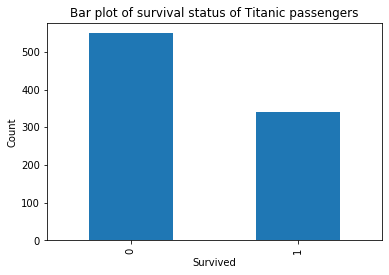

In [27]:
survived_count_df = titanic_df['Survived'].value_counts()

survived_count_df.plot.bar()
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

Let's create a plot showing the survival status of Titanic passengers with respect to the sex.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers')

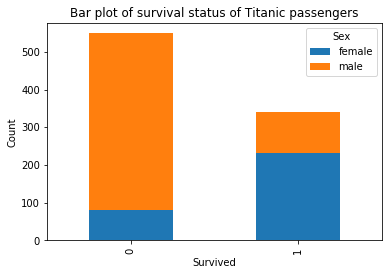

In [28]:
titanic_df.groupby(['Survived', 'Sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers')

### Histogram
If the data is continuous, histograms are used. 

With bar plots, it might be impossible to write down all the numbers that appeared. Furthermore, the x-axis will not represent the scale correctly. Use the [`hist`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html) function

Let's create a histogram of the age of Titanic passengers.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

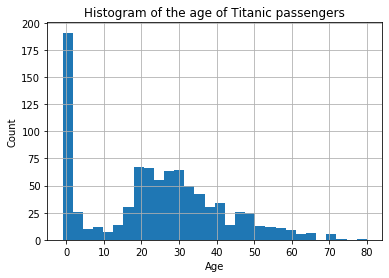

In [29]:
titanic_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

Based on the plot, we see that our histogram shows that most observations are `NaN` (represented as -1). Let us temporarily remove these observations and create the histogram again.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers')

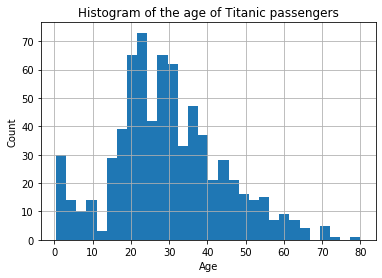

In [30]:
titanic_copy_df = titanic_df[titanic_df['Age'] != -1]
titanic_copy_df['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers')

### Scatter plot

We can use scatter plot to compare two quantitative attributes. Use the [`plot`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.plot.html) function of `matplotlib`.

Let's create a scatterlot of the fare and age of Titanic passengers.

Text(0.5, 1.0, 'Scatterplot of the fare and age of Titanic passengers')

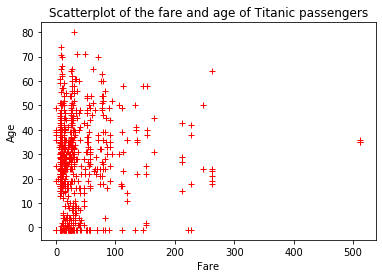

In [31]:
plt.plot(titanic_df['Fare'], titanic_df['Age'], 'r+')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatterplot of the fare and age of Titanic passengers')

## Exploratory Data Analysis

**Practice!** Visualize the relationship between the `Survived` variable and the `Age` variable. Use the appropriate plot to show the relationship.

Text(0.5, 1.0, 'Histogram of the age of Titanic passengers, grouped by survival status')

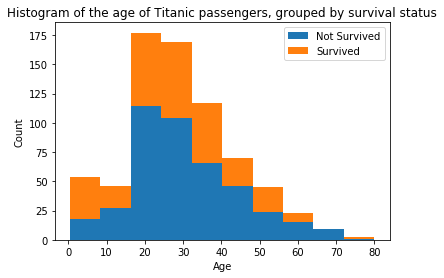

In [85]:
# Write your code here. You may add extra cells if necessary.
titanic_another_df = titanic_df[titanic_df['Age'] != -1]
pd.DataFrame({'Not Survived': titanic_another_df.groupby('Survived').get_group(0).Age, 'Survived': titanic_another_df.groupby('Survived').get_group(1).Age}).plot.hist(stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the age of Titanic passengers, grouped by survival status')

**Question:** Describe the data based on the plot. 
- From the histogram above, it can be deduced that most of the passengers are around the 20-40 range in terms of age. It is also evident in the plot that a majority of the passengers did not survive, with the children below 10 being a noticeable exception.

**Practice!** Visualize the relationship between the `Survived` variable and the `Pclass` variable. Use the appropriate plot to show the relationship.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers, grouped by Class')

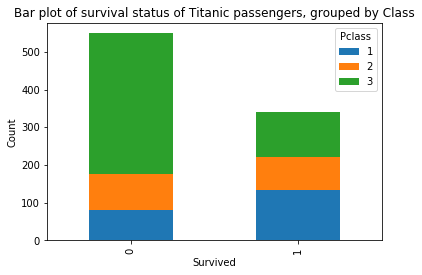

In [33]:
# Write your code here. You may add extra cells if necessary.
titanic_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers, grouped by Class')

**Question:** Describe the data based on the plot. 
- The bar plot above shows the passenger class divide between the people who survived and those who didn't. A majority of the passengers who did not survive were of the lower class, garnering more than 300 fatalities, while the upper class had less than 100 deaths and the middle class a little over that ballpark. As for the survivors, most of them were of the upper class, followed by the lower class, and then the middle class.

### Visualize the survivor count coming from each point of embarkation.

From this point on, define your own question about the dataset and try to answer it with the concepts you have learned in this Notebook. Use plots to show the relationship between variables. Describe the data based on the plot. Please make sure that you keep the Notebooks readable - use markdown cells wherever necessary to clearly articulate what you are trying to do with each code.

Text(0.5, 1.0, 'Bar plot of survival status of Titanic passengers, grouped by point of embarkation')

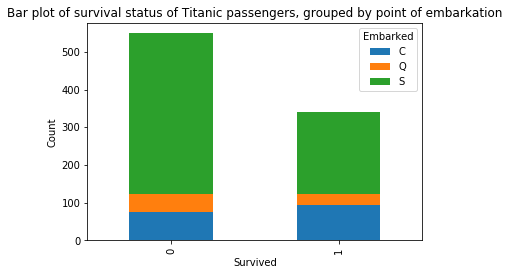

In [86]:
titanic_df.groupby(['Survived', 'Embarked']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of survival status of Titanic passengers, grouped by point of embarkation')

The plot above shows the relationship between the `Survived` and `Embarked` variables. First, the dataset was grouped by the passengers' survival status, and then, those factions are grouped by the point of embarkation of each passenger categorized in the survival status. The results are plotted as a bar plot to visualize the relationship.

Based on the plot, it can be concluded that an overhwelming majority of the passengers came from Southampton, or 'S'. It is with no surprise then that the passengers from the said point of embarkation led the count for each survival status. The same can be said on the flipside with the passengers from Queenstown, who recorded the lowest amount of people aboard the Titanic.